In [1]:
!nvidia-smi

Sat Nov 18 14:01:12 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0    24W / 300W |      0MiB / 16384MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


#Installing yolov8 and the dataset

In [3]:

!pip install ultralytics==8.0.28

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.9/166.8 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key=")
project = rf.workspace("cardd-diezp").project("detection-m16cd")
dataset = project.version(1).download("yolov8")

#Training the model

In [23]:
%cd {HOME}
# change the directories in data.yaml
!yolo task=segment mode=train model=yolov8n-seg.pt data=/content/Detection-1/data.yaml epochs=30 imgsz=416 cos_lr=True lr0= 0.0025 batch=16  name=working

/content
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
yolo/engine/trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=/content/Detection-1/data.yaml, epochs=30, patience=50, batch=16, imgsz=416, save=True, cache=False, device=None, workers=8, project=None, name=working, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=True, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, si

In [26]:
!ls {HOME}/runs/segment/working2

args.yaml					     MaskPR_curve.png	  train_batch8762.jpg
BoxF1_curve.png					     MaskR_curve.png	  val_batch0_labels.jpg
BoxP_curve.png					     results.csv	  val_batch0_pred.jpg
BoxPR_curve.png					     results.png	  val_batch1_labels.jpg
BoxR_curve.png					     train_batch0.jpg	  val_batch1_pred.jpg
confusion_matrix.png				     train_batch1.jpg	  val_batch2_labels.jpg
events.out.tfevents.1700319166.923a4ced7b24.16106.0  train_batch2.jpg	  val_batch2_pred.jpg
MaskF1_curve.png				     train_batch8760.jpg  weights
MaskP_curve.png					     train_batch8761.jpg


/content


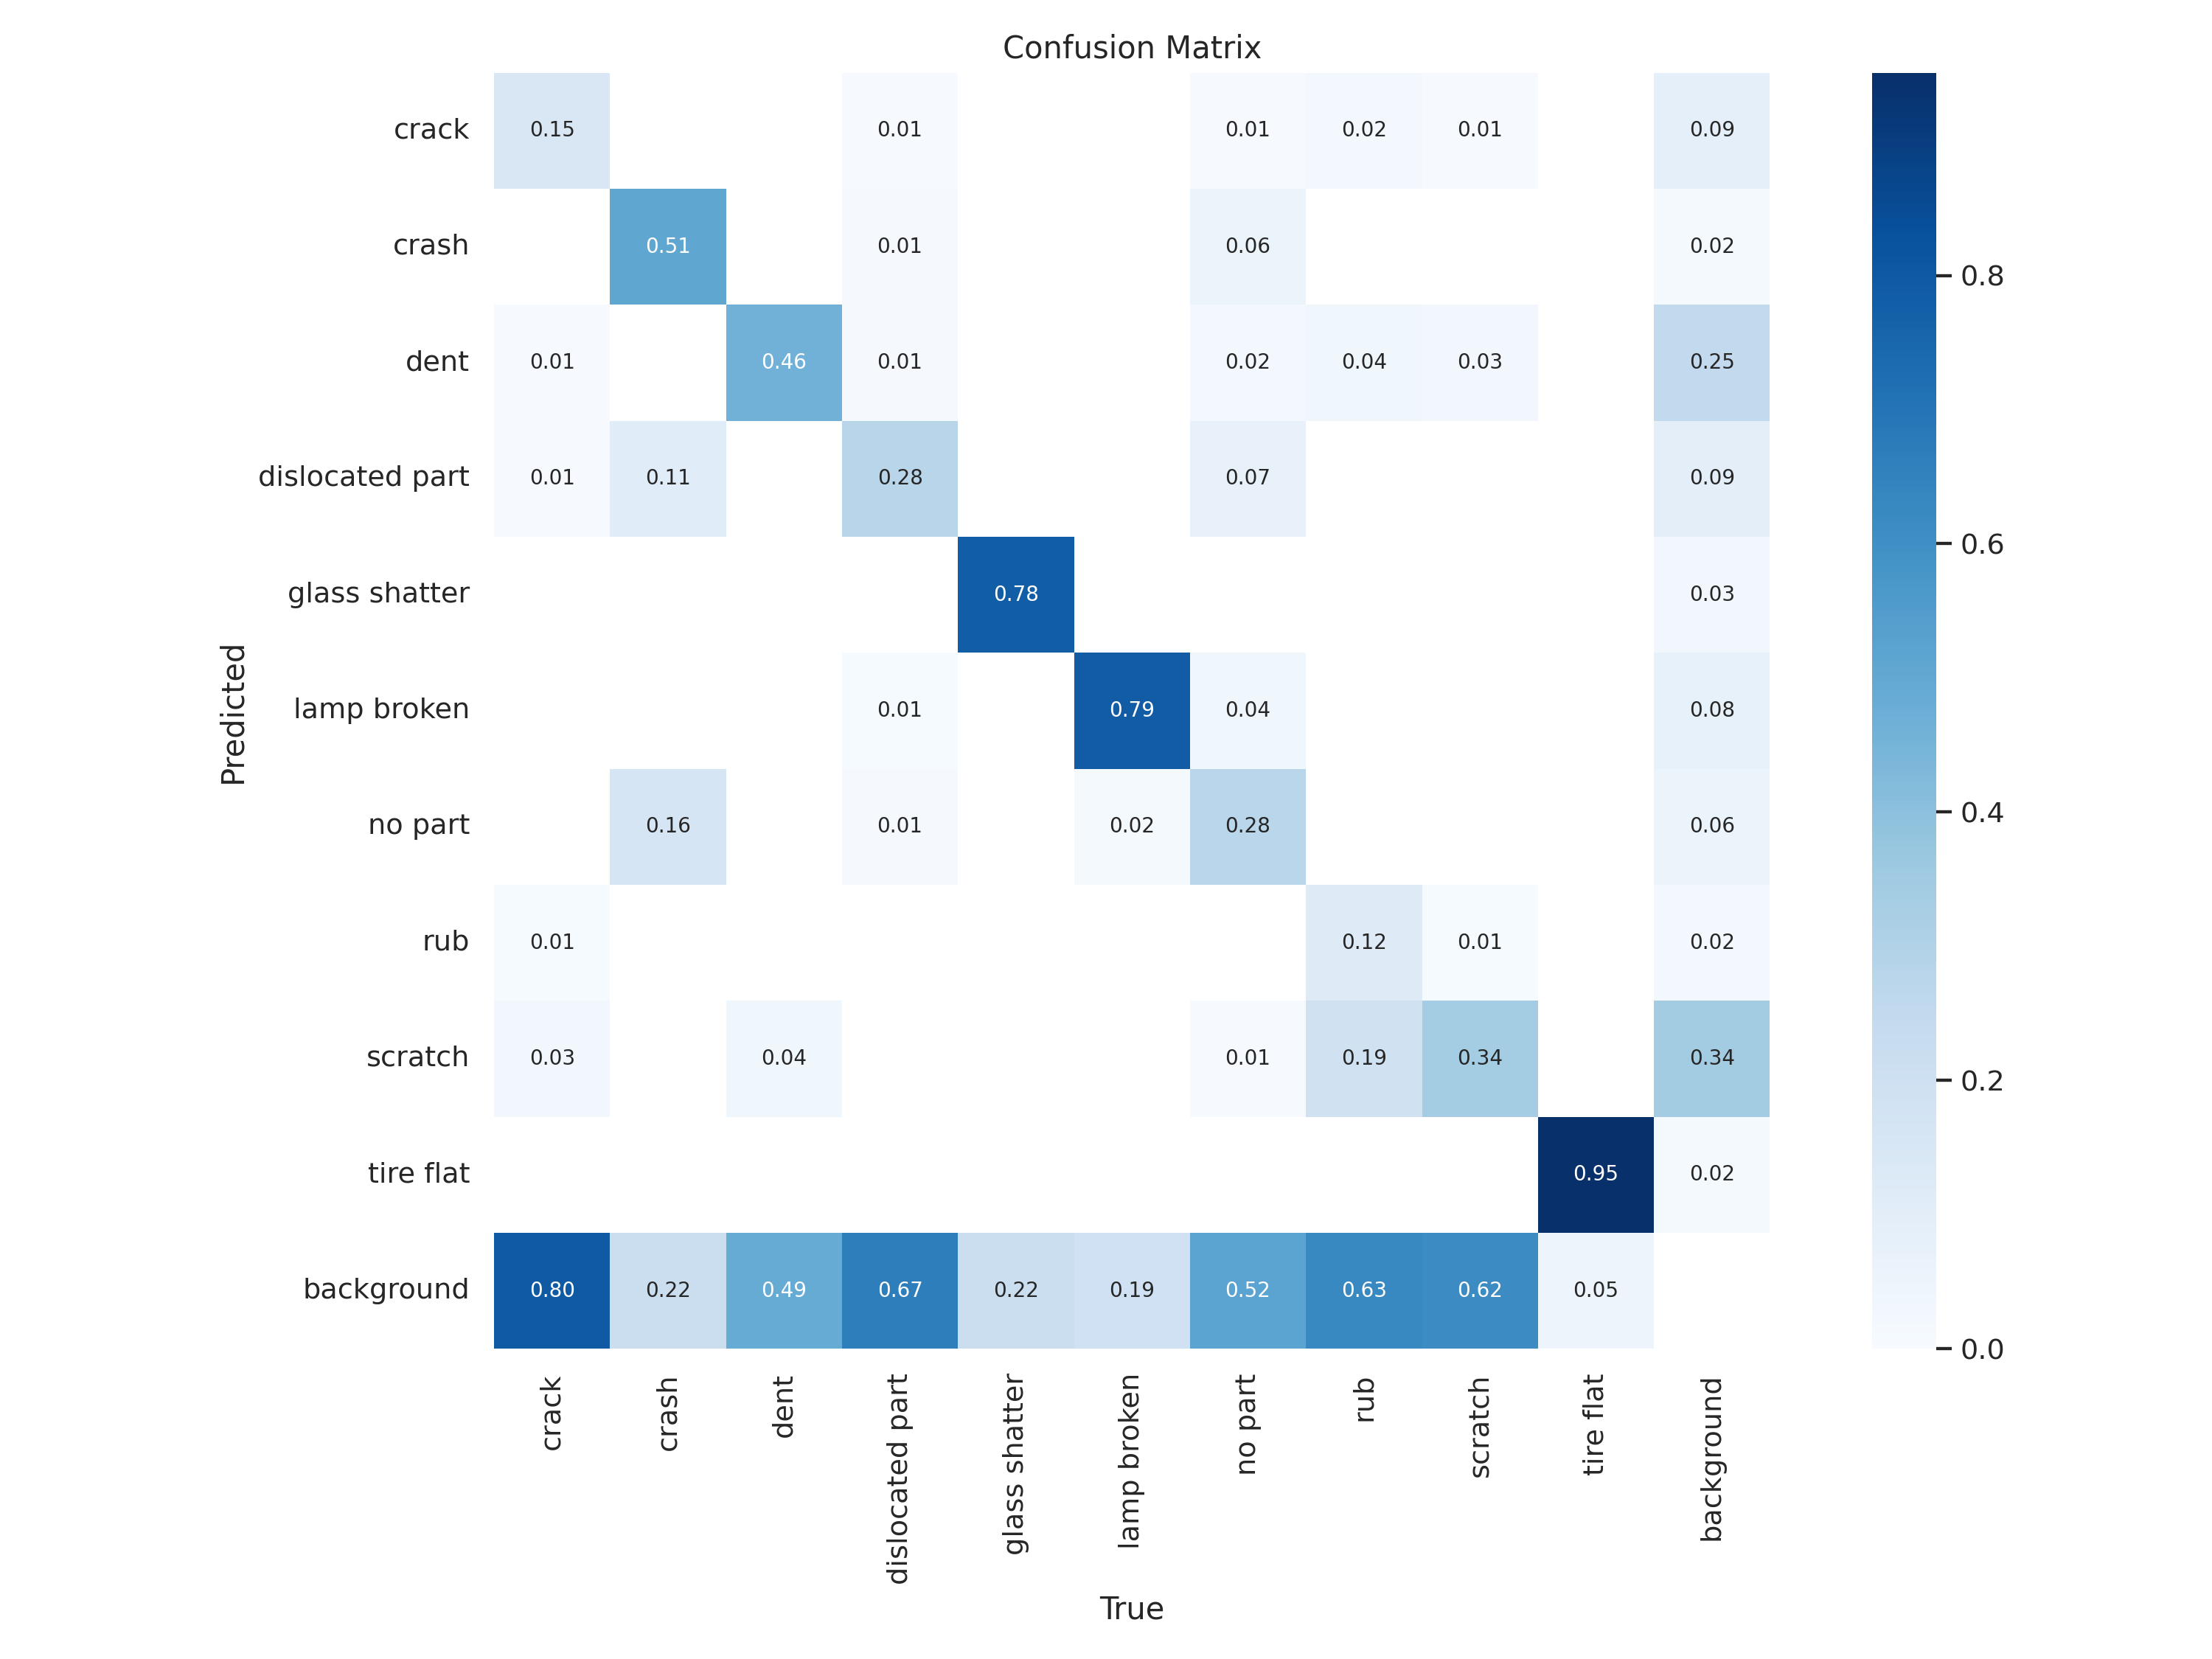

In [28]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/working2/confusion_matrix.png', width=600)

/content


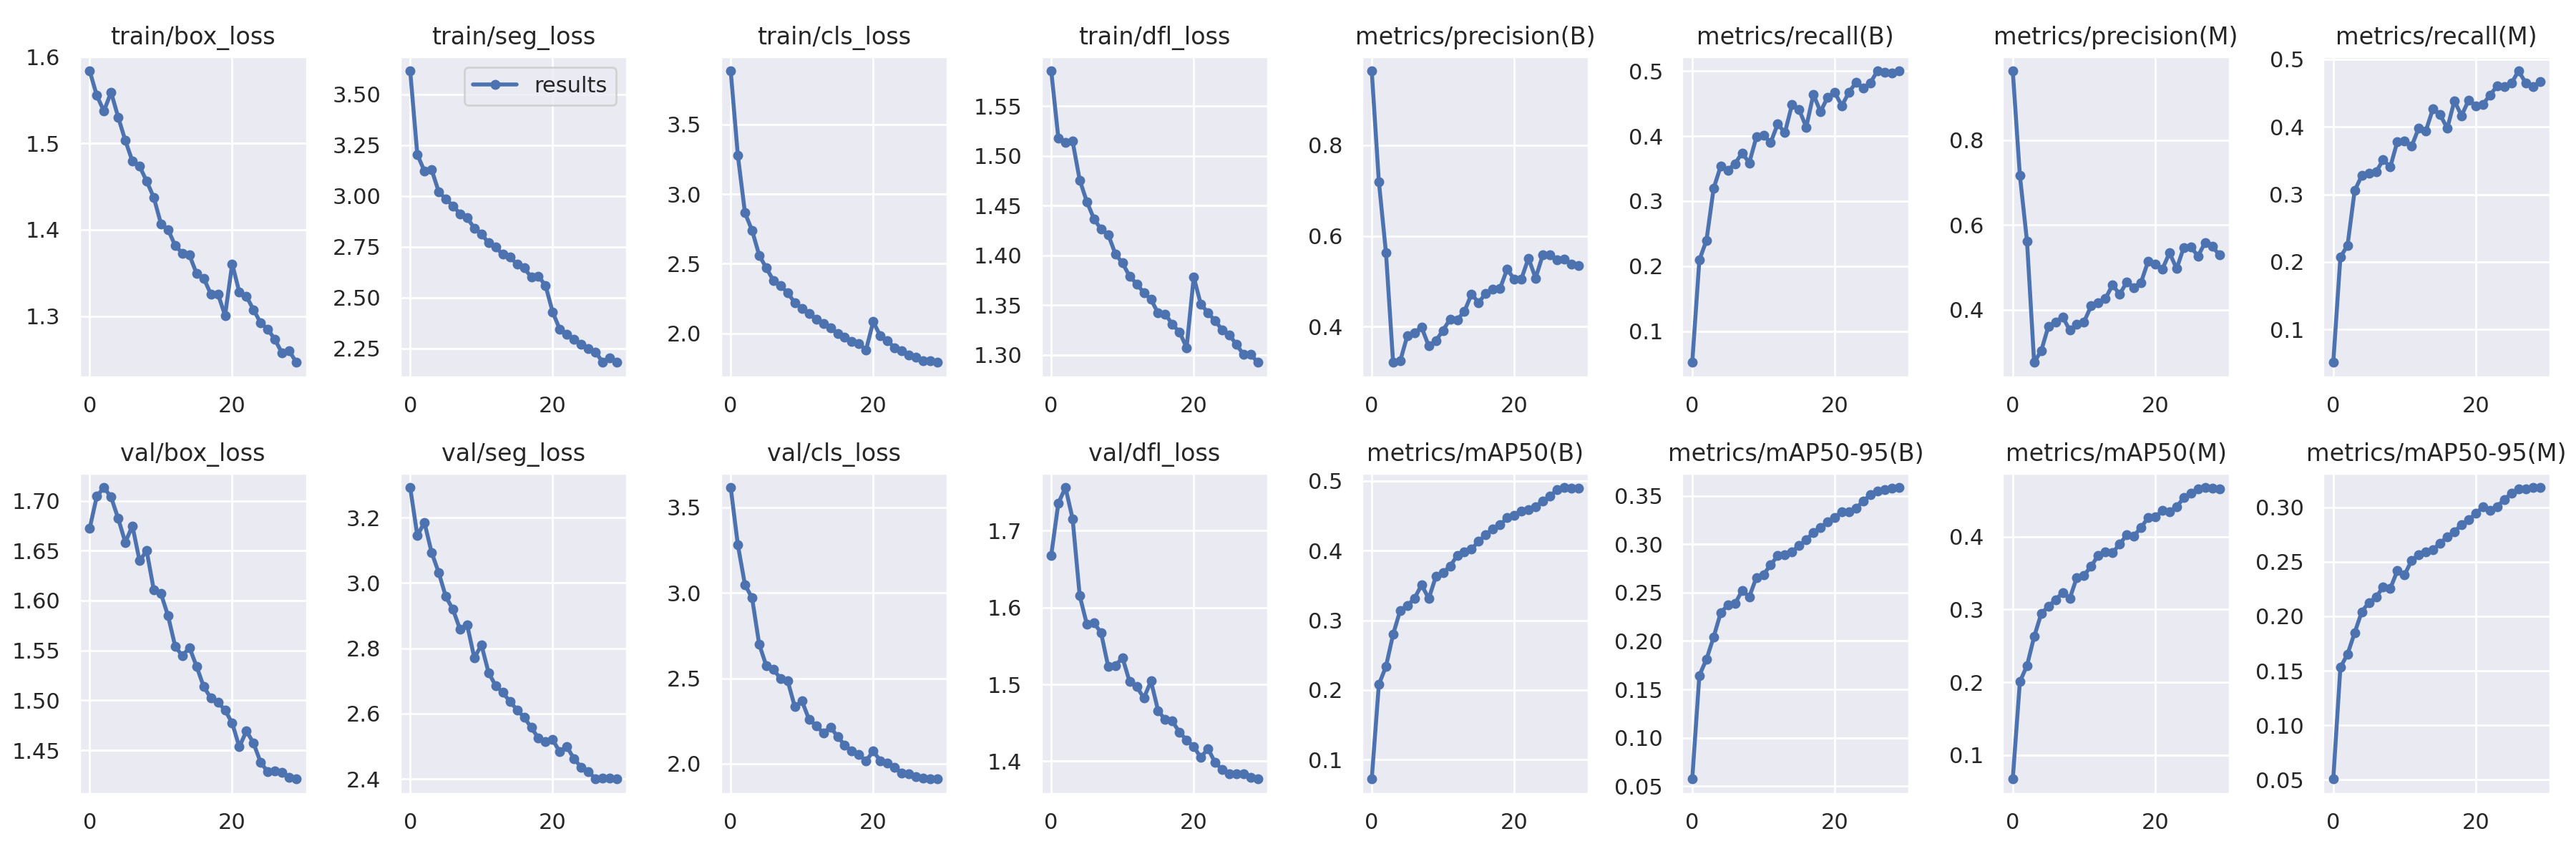

In [30]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/working2/results.png', width=600)

/content


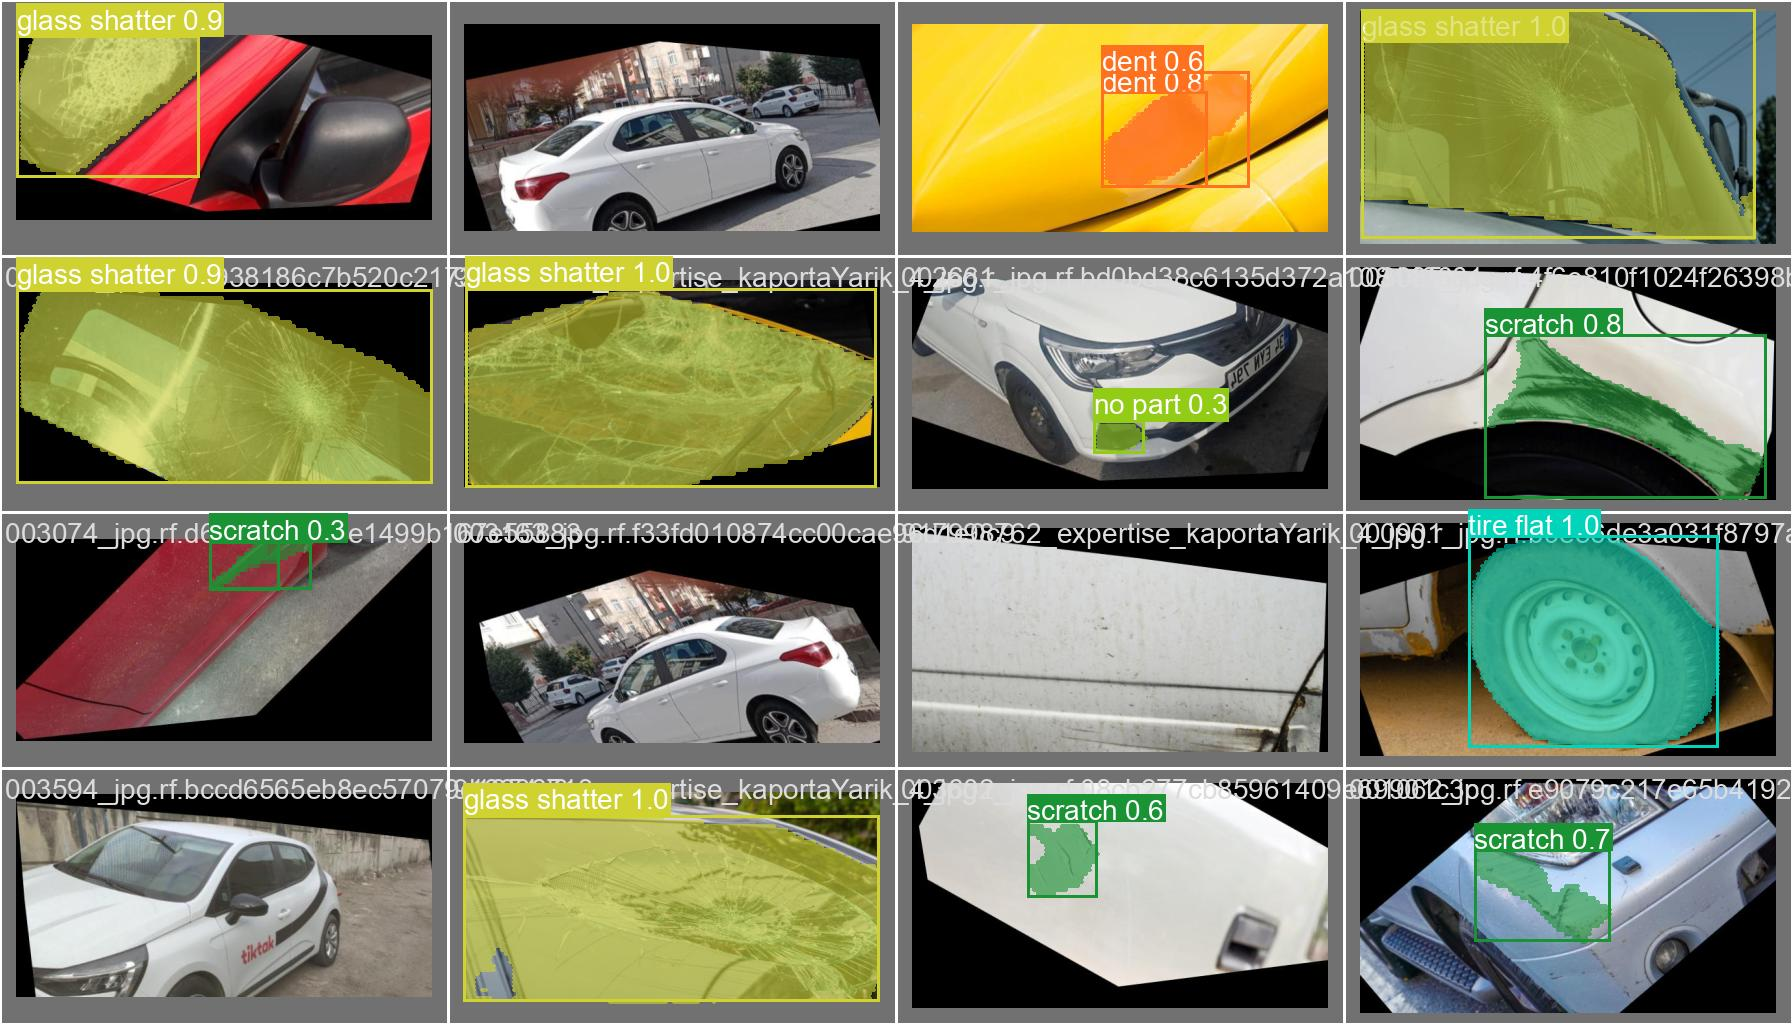

In [32]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/working2/val_batch0_pred.jpg', width=600)

#Validation

In [53]:
%cd {HOME}

!yolo task=segment mode=val model={HOME}/runs/segment/working2/weights/best.pt data=/content/Detection-1/data.yaml

/content
2023-11-18 17:27:29.505568: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-18 17:27:29.505629: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-18 17:27:29.505670: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-18 17:27:30.876809: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
YOLOv8n-seg summary (fused): 195 layers, 3260014 parameters, 0 gradients, 12.0 GFLOPs
val: Scanning /content/Detection-1/valid/lab

#Testing

In [ ]:
%cd {HOME}
!yolo task=segment mode=predict model={HOME}/runs/segment/working2/weights/best.pt conf=0.25 source=/content/Detection-1/test/images save=true boxes=True

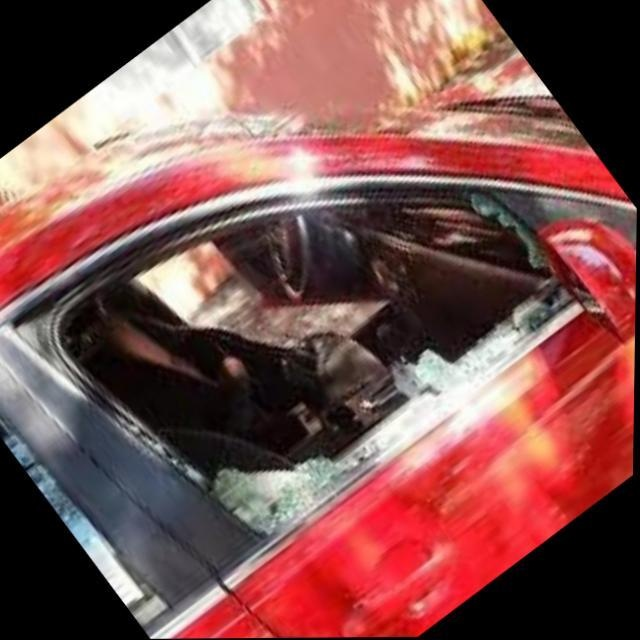

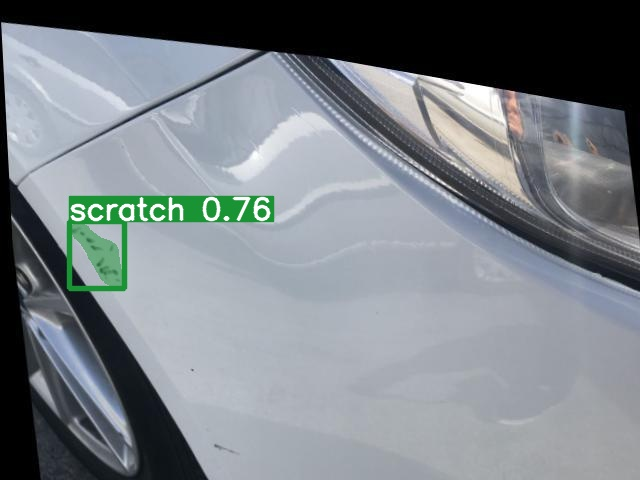

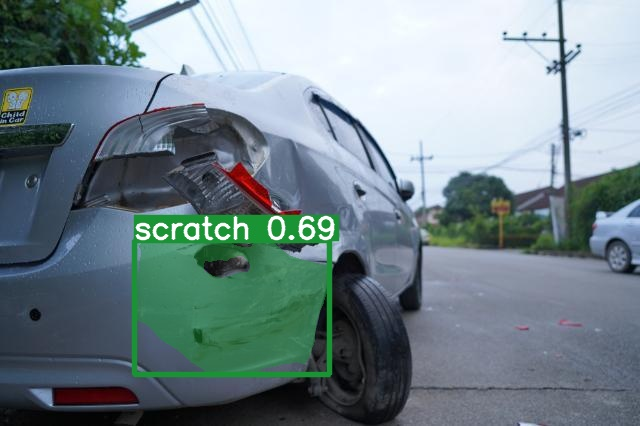

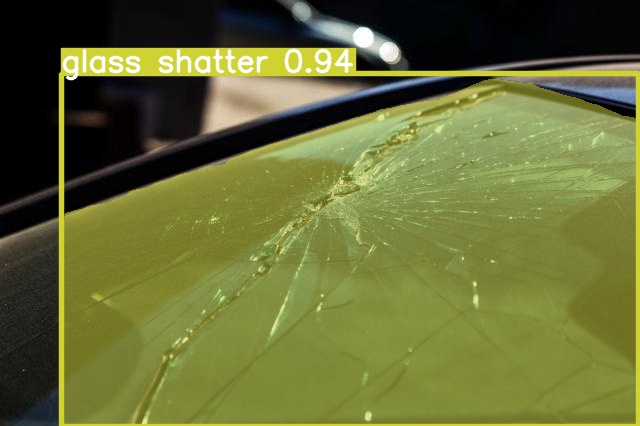

In [41]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/segment/predict/*.jpg')[5:9]:
      display(Image(filename=image_path, height=600))
      print("\n")

\